## In this exercise, a resnet18 model has been trained using two weight decay settings: wd = 0.1 vs wd = 50. What do you observe?

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()

     |████████████████████████████████| 727kB 6.3MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 1.2MB 45.4MB/s 
     |████████████████████████████████| 194kB 56.0MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 


In [2]:
#hide
from fastbook import *

In [3]:
path = untar_data(URLs.MNIST)
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)
dls = db.dataloaders(path/'training', bs = 128)

In [11]:
learn = cnn_learner(dls, resnet18, pretrained = False, metrics=error_rate)
learn.fit(10, 1e-2, wd=0.0)

epoch,train_loss,valid_loss,error_rate,time
0,0.149664,0.207697,0.045833,00:53
1,0.114893,0.472963,0.122083,00:54
2,0.088011,0.136901,0.033250,00:55
3,0.065484,0.120130,0.025667,00:53
4,0.057224,0.076198,0.019333,00:53
5,0.047572,0.054474,0.013250,00:53
6,0.043355,0.046540,0.012583,00:53
7,0.033826,0.059600,0.012500,00:53
8,0.040054,0.062937,0.015083,00:53
9,0.035405,0.045452,0.011250,00:53


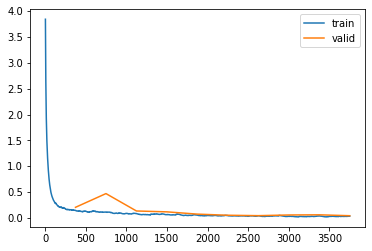

In [12]:
learn.recorder.plot_loss()

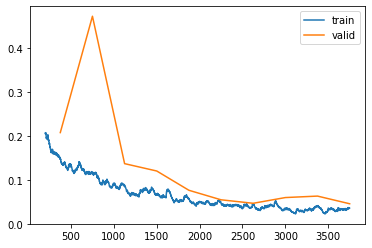

In [14]:
learn.recorder.plot_loss(skip_start=200)

In [7]:
learn = cnn_learner(dls, resnet18, pretrained = False, metrics=error_rate)
learn.fit_one_cycle(10, 1e-2, wd=50)

epoch,train_loss,valid_loss,error_rate,time
0,0.504810,1.130437,0.312250,00:54
1,1.399927,2.018841,0.716083,00:54
2,1.352268,2.057984,0.757583,00:54
3,1.199594,2.053871,0.564000,00:54
4,0.933807,2.039519,0.713583,00:54
5,0.678397,0.874031,0.293333,00:54
6,0.459394,0.685533,0.199333,00:53
7,0.361560,0.933598,0.295833,00:53
8,0.254738,0.360974,0.103917,00:54
9,0.104514,0.084996,0.022250,00:53


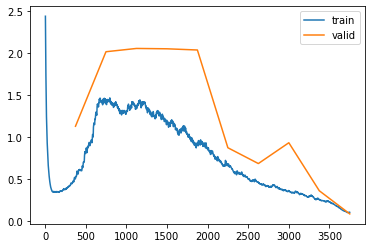

In [8]:
learn.recorder.plot_loss()

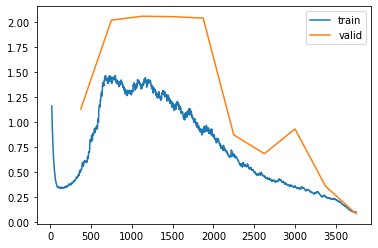

In [10]:
learn.recorder.plot_loss(skip_start=20)
